In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [130]:
postulantes = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')

In [131]:
postulantes.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [132]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [133]:
postulaciones = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv')

In [134]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [135]:
postulaciones_y_postulantes = pd.merge(postulantes, postulaciones, on='idpostulante', how='inner')

In [136]:
postulaciones_y_postulantes.head()

,idpostulante,fechanacimiento,sexo,idaviso,fechapostulacion
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15 16:22:34
1,NM5M,1970-12-03,FEM,1111920714,2018-02-06 09:04:50
2,NM5M,1970-12-03,FEM,1112346945,2018-02-22 09:04:47
3,NM5M,1970-12-03,FEM,1112345547,2018-02-22 09:04:59
4,5awk,1962-12-04,FEM,1112237522,2018-01-25 18:55:03


In [137]:
#me quedo solo con lo que me interesa
postulaciones_y_postulantes = postulaciones_y_postulantes[['fechanacimiento','sexo']]

In [138]:
#postulaciones_y_postulantes = postulaciones_y_postulantes['fechanacimiento'].str.split(' ', 1, expand=True)
postulaciones_y_postulantes['fechanacimiento'] = pd.to_datetime(postulaciones_y_postulantes['fechanacimiento'], errors = 'coerce')
postulaciones_y_postulantes.head()

,fechanacimiento,sexo
0,1970-12-03,FEM
1,1970-12-03,FEM
2,1970-12-03,FEM
3,1970-12-03,FEM
4,1962-12-04,FEM


In [139]:
#postulaciones_y_postulantes['year'] = postulaciones_y_postulantes['fechanacimiento'].dt.year
#postulaciones_y_postulantes.head()
now = datetime.now()

In [140]:
postulaciones_y_postulantes['edad'] = now - postulaciones_y_postulantes['fechanacimiento']

In [141]:
postulaciones_y_postulantes

,fechanacimiento,sexo,edad
0,1970-12-03,FEM,17296 days 00:36:38.837087
1,1970-12-03,FEM,17296 days 00:36:38.837087
2,1970-12-03,FEM,17296 days 00:36:38.837087
3,1970-12-03,FEM,17296 days 00:36:38.837087
4,1962-12-04,FEM,20217 days 00:36:38.837087
5,1962-12-04,FEM,20217 days 00:36:38.837087
6,1962-12-04,FEM,20217 days 00:36:38.837087
7,1962-12-04,FEM,20217 days 00:36:38.837087
8,1962-12-04,FEM,20217 days 00:36:38.837087
9,1962-12-04,FEM,20217 days 00:36:38.837087


In [142]:
postulaciones_y_postulantes['dias'], postulaciones_y_postulantes['trash'] = postulaciones_y_postulantes['edad'].astype(str).str.split(' ', 1).str


In [143]:
postulaciones_y_postulantes = postulaciones_y_postulantes.drop(['fechanacimiento','trash'], axis=1)
postulaciones_y_postulantes.head()

,sexo,edad,dias
0,FEM,17296 days 00:36:38.837087,17296
1,FEM,17296 days 00:36:38.837087,17296
2,FEM,17296 days 00:36:38.837087,17296
3,FEM,17296 days 00:36:38.837087,17296
4,FEM,20217 days 00:36:38.837087,20217


In [144]:
#limpio datos feos
postulaciones_y_postulantes = postulaciones_y_postulantes[postulaciones_y_postulantes['dias'] != 'NaT']

In [145]:
postulaciones_y_postulantes = postulaciones_y_postulantes.drop(['edad'], axis=1)
postulaciones_y_postulantes.head()

,sexo,dias
0,FEM,17296
1,FEM,17296
2,FEM,17296
3,FEM,17296
4,FEM,20217


In [146]:
postulaciones_y_postulantes['anios'] = postulaciones_y_postulantes['dias'].apply(lambda x: float(x)/365)
postulaciones_y_postulantes['anios'] = postulaciones_y_postulantes['anios'].astype(int)

In [147]:
postulaciones_y_postulantes['anios'].value_counts()

24     228621
26     227137
25     224391
27     218160
23     215267
22     201158
28     184931
21     180813
29     174245
30     147718
31     139033
20     133919
32     122566
33     102387
19      95133
34      87219
35      79986
36      70504
37      61478
38      56980
39      49212
40      45426
18      41180
41      37765
42      30160
43      27790
44      22422
45      20042
46      18833
47      16976
        ...  
53       7522
52       7169
54       6213
55       5746
56       5088
57       4995
58       4021
59       2592
60       1707
61       1459
17       1426
62       1002
64        683
63        580
67        244
65        129
66        115
68         98
70         80
69         58
100        27
242        20
73         20
76         14
75         12
96          6
12          6
71          5
74          3
78          1
Name: anios, Length: 64, dtype: int64

In [148]:
#hay solo tres edades mayores a los 80 años, con muy pocos valores, los filtro.
#de hecho, una vez visto el histograma, post 70 anios no hay practicamente nada.
postulaciones_y_postulantes = postulaciones_y_postulantes[postulaciones_y_postulantes['anios'] < 70]
postulaciones_y_postulantes = postulaciones_y_postulantes[postulaciones_y_postulantes['anios'] > 18]

In [149]:
postulaciones_y_postulantes['anios'].value_counts()

24    228621
26    227137
25    224391
27    218160
23    215267
22    201158
28    184931
21    180813
29    174245
30    147718
31    139033
20    133919
32    122566
33    102387
19     95133
34     87219
35     79986
36     70504
37     61478
38     56980
39     49212
40     45426
41     37765
42     30160
43     27790
44     22422
45     20042
46     18833
47     16976
48     13892
49     11074
50     10351
51      9311
53      7522
52      7169
54      6213
55      5746
56      5088
57      4995
58      4021
59      2592
60      1707
61      1459
62      1002
64       683
63       580
67       244
65       129
66       115
68        98
69        58
Name: anios, dtype: int64

In [ ]:
#revisar los bins. Preguntar si esta bien que queden espacios en blancos.
histo_edades = postulaciones_y_postulantes['anios'].plot.hist(bins=50, figsize=(20,10))
histo_edades.set_title("Histograma de la edad de los postulantes a los distintos empleos", fontsize = 16)
histo_edades.set_xlabel("Edad", fontsize = 12 )
histo_edades.set_ylabel("Cantidad de postulaciones", fontsize = 12)

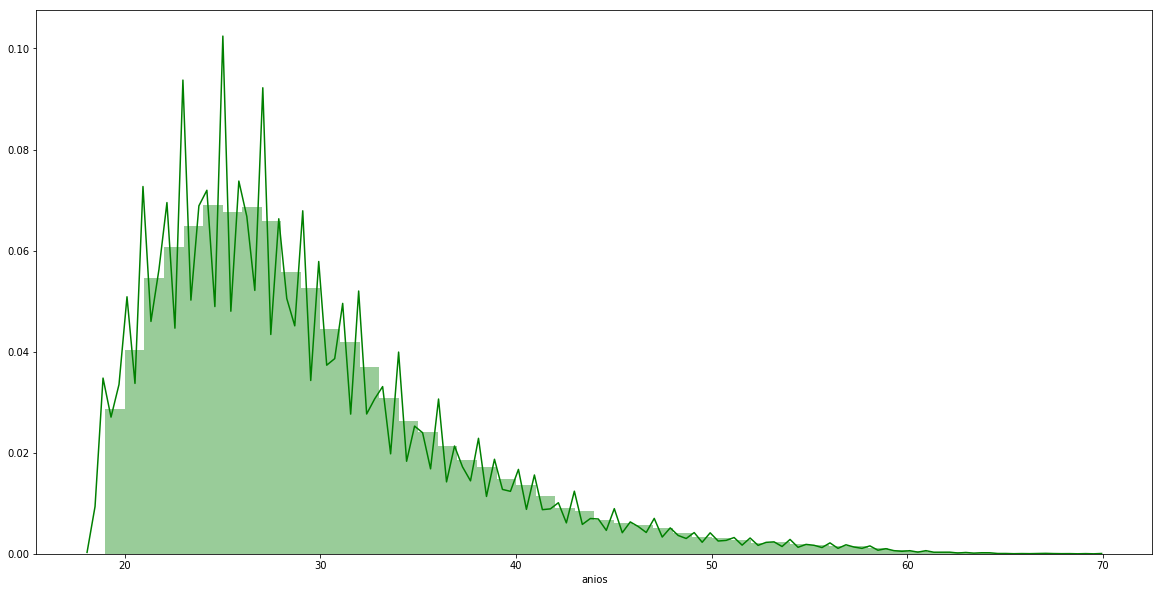

In [151]:
#grafico densidad para compararlos
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
densidad_edad = sns.distplot(postulaciones_y_postulantes['anios'], color = 'green')

In [152]:
#ahora voy a comparar por los distintos generos. Saco un df p c genero.
postulantes_hombres = postulaciones_y_postulantes[postulaciones_y_postulantes['sexo'] == 'MASC']
postulantes_hombres['anios'].value_counts()

26    107106
27    107007
24    102999
25    101486
23     95834
28     95246
29     88072
22     87370
30     76103
21     75962
31     73570
32     68534
20     56895
33     56725
34     49823
35     46156
36     39636
19     39423
37     35647
38     32525
39     26809
40     25993
41     21128
42     17725
43     16436
44     12945
46     11870
45     11261
47      9565
48      8127
50      6442
49      6198
51      5948
53      4342
52      4321
54      3851
57      3697
55      3077
56      2946
58      2865
59      1886
60      1393
61      1159
62       864
63       492
64       409
67       226
65       111
66       102
68        86
69        11
Name: anios, dtype: int64

AttributeError: Unknown property dpi

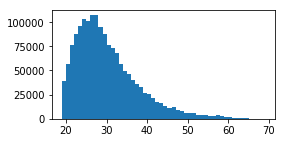

In [184]:
histo_edades_hombres = postulantes_hombres['anios'].plot.hist(bins=50, figsize=(4,2), dpi=100)
histo_edades_hombres.set_title("Histograma de la edad de los postulantes de genero masculino a los distintos empleos", fontsize = 14)
histo_edades_hombres.set_xlabel("Edad", fontsize = 12 )
histo_edades_hombres.set_ylabel("Cantidad de postulaciones", fontsize = 12)
#notemos que es bastante similar al general.

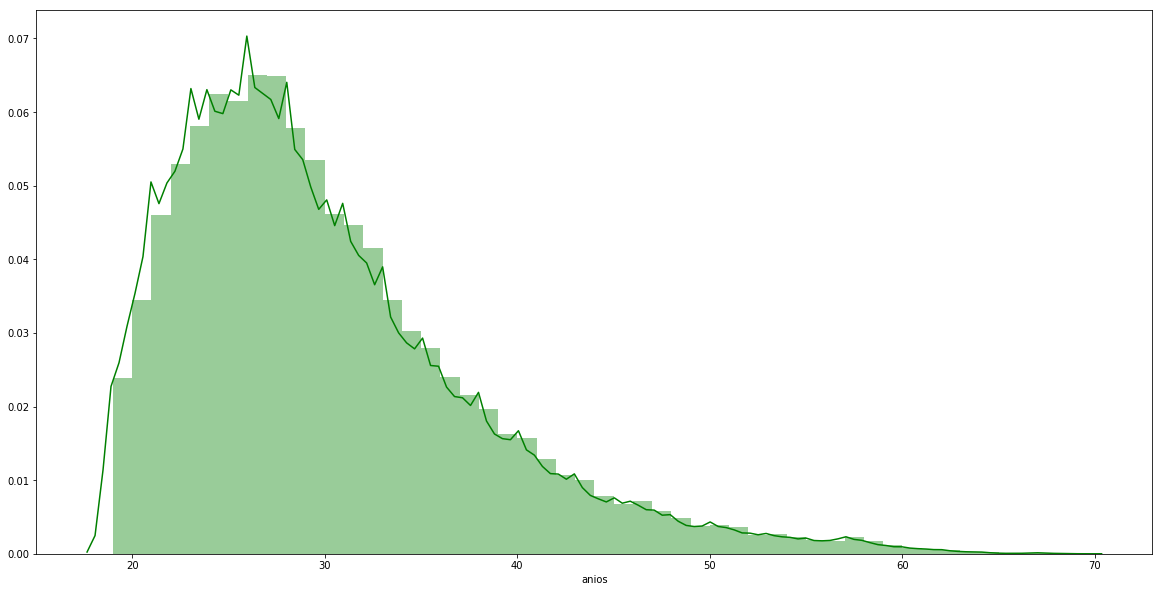

In [154]:
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
densidad_hombres = sns.distplot(postulantes_hombres['anios'], color = 'green')

Text(0.5,1,'Comparacion entre las distribuciones de las postulaciones para el total de postulantes vs el genero masculino ')

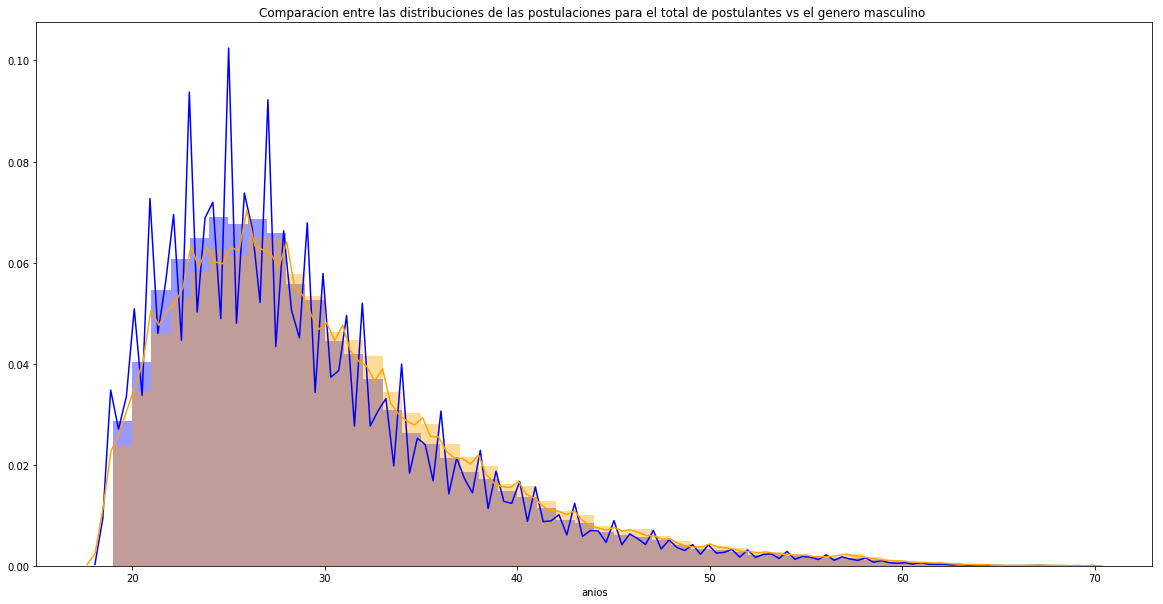

In [155]:
#comparo densidad genero masculino con histo general. (no puedo comparar histo porque tienen distinta cantidad de elementos, preguntar)
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
densidad_comp_h_g = sns.distplot(postulaciones_y_postulantes['anios'], color='blue')
densidad_comp_h_g = sns.distplot(postulantes_hombres['anios'], color='orange')
densidad_comp_h_g.set_title("Comparacion entre las distribuciones de las postulaciones para el total de postulantes vs el genero masculino ")

In [156]:
postulantes_mujeres = postulaciones_y_postulantes[postulaciones_y_postulantes['sexo'] == 'FEM']
postulantes_mujeres['anios'].value_counts()

24    125325
25    122527
26    119777
23    119041
22    113597
27    111031
21    104516
28     89217
29     86046
20     76778
30     71458
31     65255
19     54492
32     53918
33     45487
34     37298
35     33712
36     30644
37     25770
38     24418
39     22332
40     19364
41     16624
42     12388
43     11304
44      9469
45      8756
47      7387
46      6930
48      5734
49      4769
50      3900
51      3334
53      3162
52      2848
55      2638
54      2362
56      2064
57      1290
58      1134
59       703
60       312
61       298
62       138
64        89
63        88
69        47
65        18
67        18
66         9
68         3
Name: anios, dtype: int64

Text(0,0.5,'Cantidad de postulaciones')

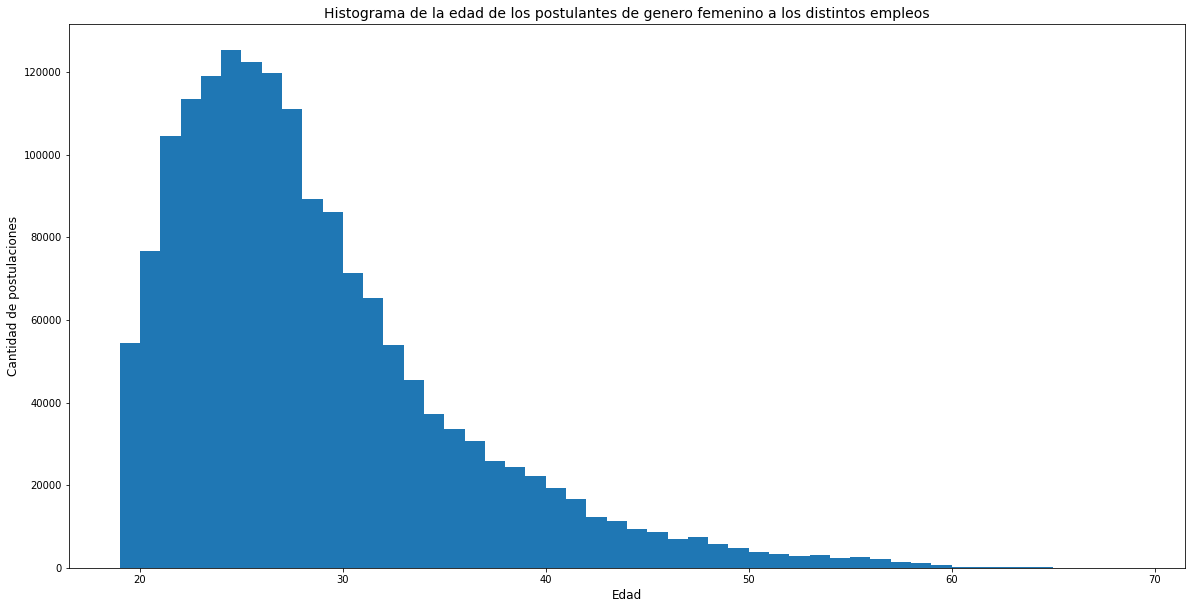

In [157]:
histo_edades_mujeres = postulantes_mujeres['anios'].plot.hist(bins=50, figsize=(20,10))
histo_edades_mujeres.set_title("Histograma de la edad de los postulantes de genero femenino a los distintos empleos", fontsize = 14)
histo_edades_mujeres.set_xlabel("Edad", fontsize = 12 )
histo_edades_mujeres.set_ylabel("Cantidad de postulaciones", fontsize = 12)

Text(0.5,1,'Comparacion entre las distribuciones de las postulaciones para el total de postulantes vs el genero femenino')

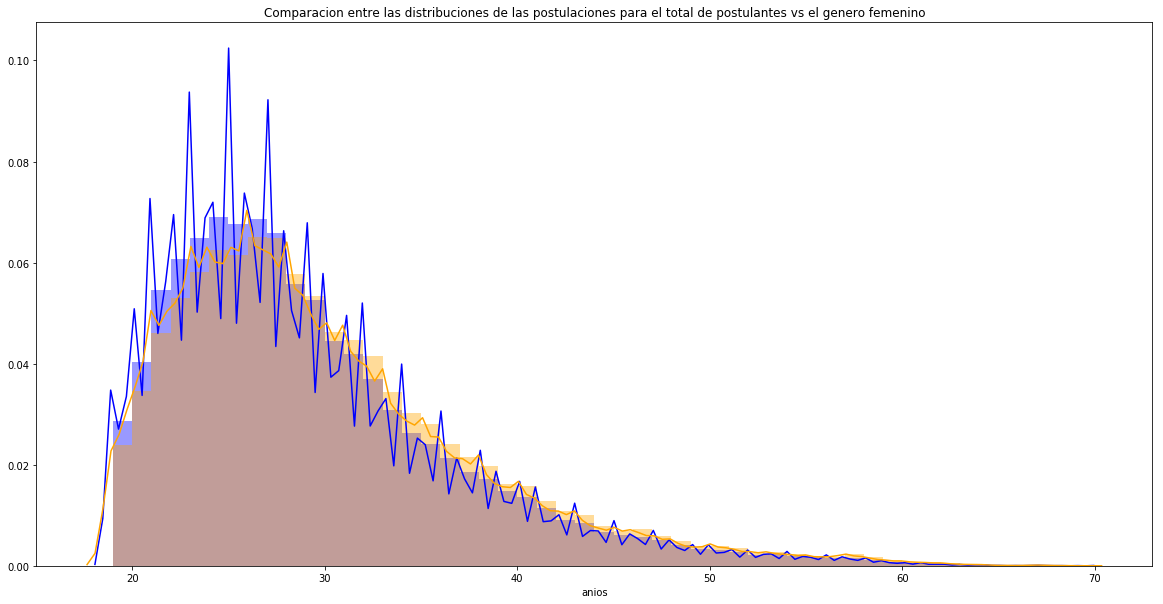

In [158]:
fig, ax = plt.subplots(figsize=dims)
densidad_comp_m_g = sns.distplot(postulaciones_y_postulantes['anios'], color='blue', label='general')
densidad_comp_m_g = sns.distplot(postulantes_hombres['anios'], color='orange', label='masculino')
densidad_comp_m_g.set_title("Comparacion entre las distribuciones de las postulaciones para el total de postulantes vs el genero femenino")

Text(0.5,1,'Comparacion entre las distribuciones de las postulaciones por edad del genero femenino vs el genero masculino ')

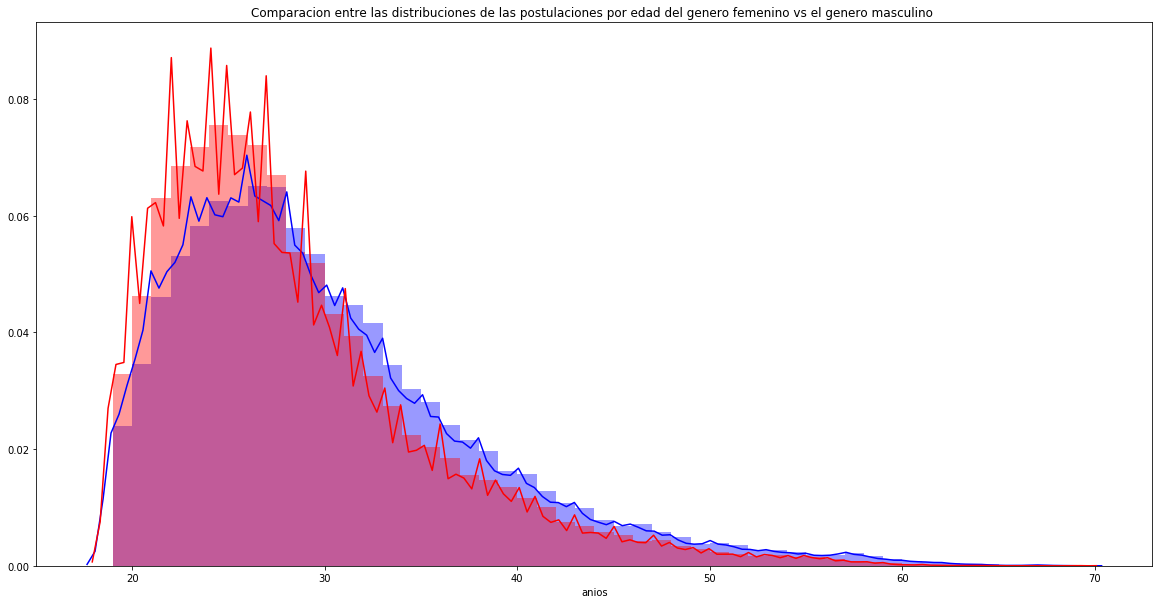

In [159]:
#finalmente comparo distribucion de hombres vs mujeres.
fig, ax = plt.subplots(figsize=dims)
densidad_comp_h_m = sns.distplot(postulantes_hombres['anios'], color='blue', label='masculino')
densidad_comp_h_m = sns.distplot(postulantes_mujeres['anios'], color='red', label='femenino')
densidad_comp_h_m.set_title("Comparacion entre las distribuciones de las postulaciones por edad del genero femenino vs el genero masculino ")

In [160]:
#pasamos a un analisis distinto. Vamos a comparar popularidad en la demanda de distintas areas relacionandolo viendo 
#que edad son mas comunes. #nos quedamos con las 5 areas mas populares y vemos el rango de edades en las que se dan.ç
postulaciones_y_postulantes = pd.merge(postulantes, postulaciones, on='idpostulante', how='inner')
avisos = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
postulaciones_avisos = pd.merge(postulaciones_y_postulantes, avisos, on='idaviso', how='inner')

In [161]:
postulaciones_avisos.head()

,idpostulante,fechanacimiento,sexo,idaviso,fechapostulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,8krKL,1972-11-06,MASC,1112257047,2018-01-21 09:45:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,EDEpY4,1980-05-22,FEM,1112257047,2018-01-15 09:07:25,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1lejrO,1968-05-05,FEM,1112257047,2018-01-16 06:01:50,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,Y0MNYJ,1977-02-28,FEM,1112257047,2018-01-16 16:22:36,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [162]:
#vemos las 5 areas mas populares.
postulaciones_avisos['nombre_area'].value_counts()

Ventas                                   408148
Administración                           291135
Producción                               277089
Comercial                                216677
Atención al Cliente                      195636
Recepcionista                            137485
Call Center                              126430
Telemarketing                             87506
Tesorería                                 78450
Mantenimiento y Limpieza                  63308
Contabilidad                              55563
Almacén / Depósito / Expedición           53261
Gastronomia                               51213
Recursos Humanos                          45668
Secretaria                                39188
Logística                                 37139
Administración de Personal                37011
Créditos y Cobranzas                      36690
Marketing                                 29861
Legal                                     29295
Farmacéutica                            

In [163]:
#me deshago de las columnas que no necesito.
postulaciones_avisos = postulaciones_avisos.drop(['titulo','nombre_zona','ciudad','mapacalle','nivel_laboral'\
            ,'denominacion_empresa','idpais','fechapostulacion', 'descripcion','sexo'], axis=1)

In [164]:
postulaciones_avisos.head()

,idpostulante,fechanacimiento,idaviso,tipo_de_trabajo,nombre_area
0,NM5M,1970-12-03,1112257047,Part-time,Atención al Cliente
1,8krKL,1972-11-06,1112257047,Part-time,Atención al Cliente
2,EDEpY4,1980-05-22,1112257047,Part-time,Atención al Cliente
3,1lejrO,1968-05-05,1112257047,Part-time,Atención al Cliente
4,Y0MNYJ,1977-02-28,1112257047,Part-time,Atención al Cliente


In [165]:
postulaciones_avisos['fechanacimiento'] = pd.to_datetime(postulaciones_avisos['fechanacimiento'], errors = 'coerce')
now = datetime.now()
postulaciones_avisos['edad'] = now - postulaciones_avisos['fechanacimiento']
postulaciones_avisos['dias'], postulaciones_avisos['trash'] = postulaciones_avisos['edad'].astype(str).str.split(' ', 1).str
postulaciones_avisos = postulaciones_avisos.drop(['trash','fechanacimiento'], axis=1)
postulaciones_avisos.head()


,idpostulante,idaviso,tipo_de_trabajo,nombre_area,edad,dias
0,NM5M,1112257047,Part-time,Atención al Cliente,17296 days 00:37:14.821926,17296
1,8krKL,1112257047,Part-time,Atención al Cliente,16592 days 00:37:14.821926,16592
2,EDEpY4,1112257047,Part-time,Atención al Cliente,13838 days 00:37:14.821926,13838
3,1lejrO,1112257047,Part-time,Atención al Cliente,18238 days 00:37:14.821926,18238
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,15017 days 00:37:14.821926,15017


In [166]:
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['dias'] != 'NaT']
postulaciones_avisos['anios'] = postulaciones_avisos['dias'].apply(lambda x: float(x)/365)
postulaciones_avisos['anios'] = postulaciones_avisos['anios'].astype(int)
postulaciones_avisos = postulaciones_avisos.drop(['edad', 'dias'], axis=1)
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['anios'] < 65]
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['anios'] > 18]

In [167]:
postulaciones_avisos.head()

,idpostulante,idaviso,tipo_de_trabajo,nombre_area,anios
0,NM5M,1112257047,Part-time,Atención al Cliente,47
1,8krKL,1112257047,Part-time,Atención al Cliente,45
2,EDEpY4,1112257047,Part-time,Atención al Cliente,37
3,1lejrO,1112257047,Part-time,Atención al Cliente,49
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,41


In [168]:
postulaciones_avisos_filt = postulaciones_avisos[postulaciones_avisos['nombre_area'].str.contains("Ventas|Administración|Producción|Comercial|Atención al Cliente")]
#keys = ['Atención al Cliente','Producción','Administración','Comercial', 'Ventas']

In [169]:
postulaciones_avisos_filt['nombre_area'].value_counts()

Ventas                                392866
Administración                        286851
Producción                            270246
Comercial                             211510
Atención al Cliente                   190137
Administración de Personal             36241
Ventas Internacionales/Exportación      6835
Ingeniería de Ventas                     958
Administración de Base de Datos          507
Name: nombre_area, dtype: int64

In [170]:
#filtro los que me quedaron molestando
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Administración de Personal']
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Ingeniería de Ventas']
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Administración de Base de Datos']
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Ventas Internacionales/Exportación']
postulaciones_avisos_filt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,idpostulante,idaviso,tipo_de_trabajo,nombre_area,anios
0,NM5M,1112257047,Part-time,Atención al Cliente,47
1,8krKL,1112257047,Part-time,Atención al Cliente,45
2,EDEpY4,1112257047,Part-time,Atención al Cliente,37
3,1lejrO,1112257047,Part-time,Atención al Cliente,49
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,41


In [171]:
postulaciones_avisos_filt['nombre_area'].value_counts()

Ventas                 392866
Administración         286851
Producción             270246
Comercial              211510
Atención al Cliente    190137
Name: nombre_area, dtype: int64

(18, 40)

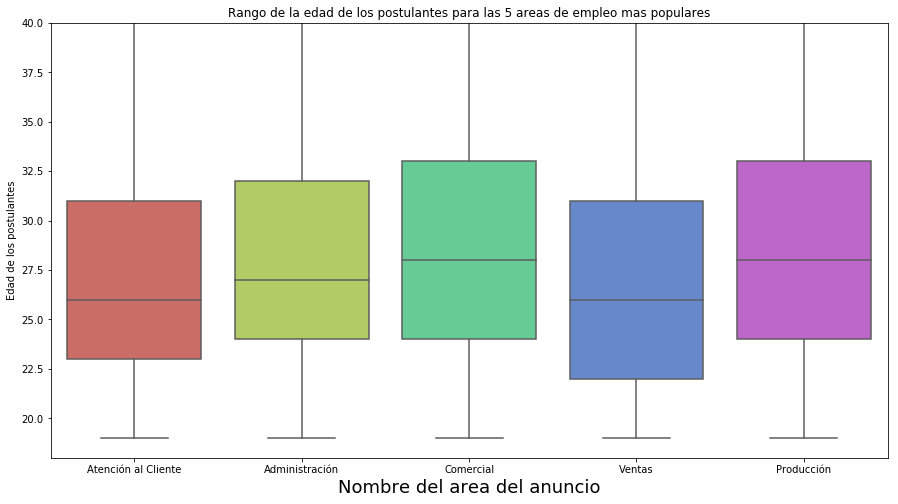

In [172]:
dims=(15,8)
fig, ax = plt.subplots(figsize=dims)
box_edad_areas = sns.boxplot(x='nombre_area', y='anios', data=postulaciones_avisos_filt, palette='hls')
box_edad_areas.set_xlabel("Nombre del area del anuncio", fontsize = 18)
box_edad_areas.set_ylabel("Edad de los postulantes")
box_edad_areas.set_title("Rango de la edad de los postulantes para las 5 areas de empleo mas populares")
plt.ylim(18, 40)

In [173]:
#ahora veamos los empleos mas populares determinando rangos de edades.
#defino funcion para mapear las edades.
def map(number):
    if number in range (18,25):
        return "18-24"
    if number in range(25, 35):
        return "25-34"
    if number in range(35, 50):
        return "35-49"
    if number in range(50, 66):
        return "50-65"

In [174]:
postulaciones_avisos['rango_edades'] = postulaciones_avisos['anios'].map(map)

In [175]:
postulaciones_avisos.head()

,idpostulante,idaviso,tipo_de_trabajo,nombre_area,anios,rango_edades
0,NM5M,1112257047,Part-time,Atención al Cliente,47,35-49
1,8krKL,1112257047,Part-time,Atención al Cliente,45,35-49
2,EDEpY4,1112257047,Part-time,Atención al Cliente,37,35-49
3,1lejrO,1112257047,Part-time,Atención al Cliente,49,35-49
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,41,35-49


In [176]:
#filtramos por las 5 areas mas populares en cuanto a postulaciones para cada rango de edad que definimos.
postulaciones_edad_18_a_24 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == '18-24']
postulaciones_edad_18_a_24['nombre_area'].value_counts()

Ventas                                   161955
Administración                            82428
Atención al Cliente                       75347
Producción                                72117
Comercial                                 62964
Recepcionista                             56258
Call Center                               52711
Telemarketing                             41205
Tesorería                                 25920
Gastronomia                               19591
Mantenimiento y Limpieza                  19161
Almacén / Depósito / Expedición           14402
Camareros                                 12861
Secretaria                                12847
Contabilidad                              12376
Farmacéutica                              10781
Administración de Personal                10449
Cadetería                                  9206
Recursos Humanos                           9186
Créditos y Cobranzas                       8986
Soporte Técnico                         

In [177]:
def map_area(area):
    keys = ['Ventas', 'Administración','Atención al Cliente', 'Producción', 'Comercial']
    if area in keys:
        return area
    return "Otro"

In [178]:
postulaciones_edad_18_a_24['nombre_area'] = postulaciones_edad_18_a_24['nombre_area'].map(map_area)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [179]:
postulaciones_edad_18_a_24 = postulaciones_edad_18_a_24[postulaciones_edad_18_a_24['nombre_area'] != "Otro"]

[Text(0,0,'Ventas'),
 Text(0,0,'Administración'),
 Text(0,0,'Atención al Cliente'),
 Text(0,0,'Producción'),
 Text(0,0,'Comercial')]

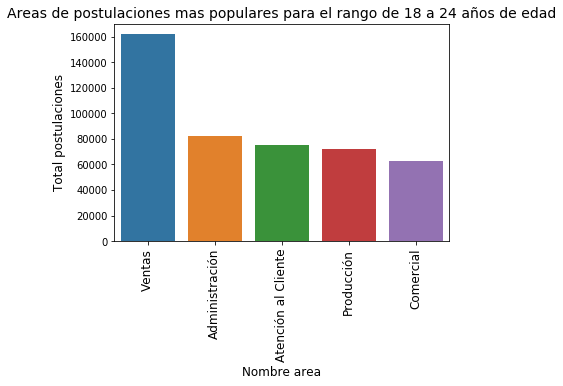

In [180]:
popus1 = sns.countplot(x='nombre_area', data=postulaciones_edad_18_a_24, order=postulaciones_edad_18_a_24['nombre_area'].value_counts().index)
popus1.set_title("Areas de postulaciones mas populares para el rango de 18 a 24 años de edad", fontsize=14)
popus1.set_xlabel("Nombre area", fontsize = 12)
popus1.set_ylabel("Total postulaciones", fontsize=12)
popus1.set_xticklabels(popus1.get_xticklabels(), rotation=90, fontsize=12)

In [181]:
postulaciones_edad_25_a_34 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == "25-34"]
postulaciones_edad_25_a_34['nombre_area'].value_counts()

Ventas                                   172534
Administración                           149108
Producción                               147095
Comercial                                102102
Atención al Cliente                       88673
Recepcionista                             60223
Call Center                               51658
Tesorería                                 37874
Telemarketing                             32566
Contabilidad                              28484
Mantenimiento y Limpieza                  28130
Almacén / Depósito / Expedición           26087
Recursos Humanos                          23934
Gastronomia                               21775
Logística                                 18964
Administración de Personal                18780
Créditos y Cobranzas                      18275
Secretaria                                17579
Marketing                                 17227
Legal                                     17017
Soporte Técnico                         

In [182]:
def map_area_2(area):
    keys = ['Ventas', 'Administración', 'Producción', 'Atención al Cliente', 'Comercial']
    if area in keys:
        return area
    return "Otro"

In [183]:
postulaciones_edad_25_a_34['nombre_area'] = postulaciones_edad_25_a_34['nombre_area'].map(map_area_2)
postulaciones_edad_25_a_34 = postulaciones_edad_25_a_35[postulaciones_edad_25_a_34['nombre_area'] != "Otro"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
popus2 = sns.countplot(x='nombre_area', data=postulaciones_edad_25_a_34, order=postulaciones_edad_25_a_35['nombre_area'].value_counts().index)
popus2.set_title("Area de postulaciones mas populares para el rango de 25 a 34 años de edad")
popus2.set_xlabel("Nombre area", fontsize = 12)
popus2.set_ylabel("Total postulaciones", fontsize = 12)
popus2.set_xticklabels(popus2.get_xticklabels(), rotation=90, fontsize=12)

In [ ]:
postulaciones_edad_35_a_49 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == "35-49"]
postulaciones_edad_35_a_49['nombre_area'].value_counts()

In [ ]:
postulaciones_edad_35_a_49['nombre_area'] = postulaciones_edad_35_a_49['nombre_area'].map(map_area)
postulaciones_edad_35_a_49 = postulaciones_edad_35_a_49[postulaciones_edad_35_a_49['nombre_area'] != "Otro"]

In [ ]:
popus3 = sns.countplot(x='nombre_area', data=postulaciones_edad_35_a_49, order=postulaciones_edad_35_a_49['nombre_area'].value_counts().index)
popus3.set_title("Area de postulaciones mas populares para el rango de 25 a 34 años de edad")
popus3.set_xlabel("Nombre area", fontsize = 12)
popus3.set_ylabel("Total postulaciones", fontsize = 12)
popus3.set_xticklabels(popus3.get_xticklabels(), rotation=90, fontsize=12)

In [ ]:
postulaciones_edad_50_a_65 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == "50-65"]
postulaciones_edad_50_a_65['nombre_area'].value_counts()

In [ ]:
def map_area_3(area):
    keys = ['Ventas', 'Administración', 'Producción', 'Contabilidad', 'Comercial']
    if area in keys:
        return area
    return "Otro"

In [ ]:
postulaciones_edad_50_a_65['nombre_area'] = postulaciones_edad_50_a_65['nombre_area'].map(map_area_2)
postulaciones_edad_50_a_65 = postulaciones_edad_50_a_65[postulaciones_edad_50_a_65['nombre_area'] != "Otro"]

In [ ]:
popus4 = sns.countplot(x='nombre_area', data=postulaciones_edad_50_a_65, order=postulaciones_edad_50_a_65['nombre_area'].value_counts().index)
popus4.set_title("Area de postulaciones mas populares para el rango de 25 a 34 años de edad")
popus4.set_xlabel("Nombre area", fontsize = 12)
popus4.set_ylabel("Total postulaciones", fontsize = 12)
popus4.set_xticklabels(popus4.get_xticklabels(), rotation=90, fontsize=12)